In [67]:
from IPython.display import clear_output

In [68]:
!pip install easyocr
clear_output()

In [69]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [70]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

PROVINSI DKI JAKARTA
JAKARTA BARAT
NIK
3171234567890123
Nama
MIRA SETIAWAN
TempatTgl Lahir
JAKARTA, 18-02-1986
Jenis Kelamin
PEREMPUAN
Gol. Darah
Alamat
JL. PASTI CEPAT A7/66
RTIRW
007/008
KellDesa
PEGADUNGAN
Kecamatan
KALIDERES
Agama
ISLAM
Status Perkawinan
KAWIN
Pekerjaan
PEGAWAI SWASTA
Kewarganegaraan
WNI
JAKARTA BARAT
Berlaku Hingga
22-02- 2017
02-12-2012


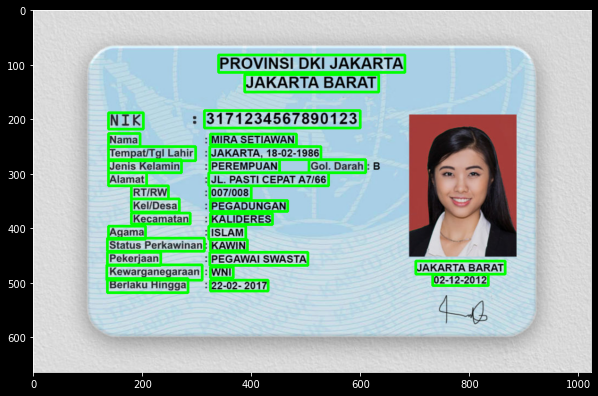

In [71]:
img = cv2.imread('ktp.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
spacer = 50
reader = easyocr.Reader(['id'], gpu=True)
result = reader.readtext(img)
result

data = []

for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    data.append(text)
    print(text)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [72]:
data

['PROVINSI DKI JAKARTA',
 'JAKARTA BARAT',
 'NIK',
 '3171234567890123',
 'Nama',
 'MIRA SETIAWAN',
 'TempatTgl Lahir',
 'JAKARTA, 18-02-1986',
 'Jenis Kelamin',
 'PEREMPUAN',
 'Gol. Darah',
 'Alamat',
 'JL. PASTI CEPAT A7/66',
 'RTIRW',
 '007/008',
 'KellDesa',
 'PEGADUNGAN',
 'Kecamatan',
 'KALIDERES',
 'Agama',
 'ISLAM',
 'Status Perkawinan',
 'KAWIN',
 'Pekerjaan',
 'PEGAWAI SWASTA',
 'Kewarganegaraan',
 'WNI',
 'JAKARTA BARAT',
 'Berlaku Hingga',
 '22-02- 2017',
 '02-12-2012']

In [85]:
nik = data[3]
nama = data[5]
ttl = data[7]
jenis_kelamin = data[9]
golongan_darah = '-'
alamat = data[12]
rt_rw = data[14]
kelurahan = data[16]
kecamatan = data[18]
agama = data[20]
status_perkawinan = data[22]
pekerjaan = data[24]
kewarganegaraan = data[26]
berlaku_hingga = data[29]

In [86]:
if agama[:2] == 'IS':
  agama = 'ISLAM'

In [87]:
agama

'ISLAM'

In [88]:
print(kewarganegaraan)

WNI


In [96]:
print('NIK:', nik)
print('Nama:', nama)
print('Tempat Lahir:', ttl)
print('Jenis Kelamin:', jenis_kelamin)
print('Golongan Darah:')
print('Alamat:', alamat)
print('RT:', rt_rw[:3])
print('RW:', rt_rw[4:])
print('Kel/Desa:', kelurahan)
print('Kecamatan:', kecamatan)
print('Agama:', agama)
print('Status Perkawinan:', status_perkawinan)
print('Pekerjaan:', pekerjaan)
print('Kewarganegaraan:', kewarganegaraan)
print('Berlaku Hingga:', berlaku_hingga)

NIK: 3171234567890123
Nama: MIRA SETIAWAN
Tempat Lahir: JAKARTA, 18-02-1986
Jenis Kelamin: PEREMPUAN
Golongan Darah:
Alamat: JL. PASTI CEPAT A7/66
RT: 007
RW: 008
Kel/Desa: PEGADUNGAN
Kecamatan: KALIDERES
Agama: ISLAM
Status Perkawinan: KAWIN
Pekerjaan: PEGAWAI SWASTA
Kewarganegaraan: WNI
Berlaku Hingga: 22-02- 2017


In [90]:
ktp_dict = {
    "nik": nik,
    "nama": nama,
    "ttl": ttl,
    "jenis_kelamin": jenis_kelamin,
    "golongan_darah": golongan_darah,
    "alamat": alamat,
    "rt": rt_rw[:3],
    "rw": rt_rw[4:],
    "agama": agama,
    "status_perkawinan": status_perkawinan,
    "pekerjaan": pekerjaan,
    "kewarganegaraan": kewarganegaraan,
    "berlaku_hingga": berlaku_hingga
}

In [91]:
import json

json_object = json.dumps(ktp_dict)

with open('result_{}.json'.format(nama), 'w') as outfile:
  outfile.write(json_object)

In [92]:
json_object

'{"nik": "3171234567890123", "nama": "MIRA SETIAWAN", "ttl": "JAKARTA, 18-02-1986", "jenis_kelamin": "PEREMPUAN", "golongan_darah": "-", "alamat": "JL. PASTI CEPAT A7/66", "rt": "007", "rw": "008", "agama": "ISLAM", "status_perkawinan": "KAWIN", "pekerjaan": "PEGAWAI SWASTA", "kewarganegaraan": "WNI", "berlaku_hingga": "22-02- 2017"}'